In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [2]:
from pathlib import Path
qi = Path(Path.home(),"Downloads","heartattack.csv")

In [3]:
df = pd.read_csv(qi,na_values='?')

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df['target'].value_counts(dropna=False)

1    165
0    138
Name: target, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df=df.drop(['slope','ca','thal'],axis=1)
df = df.dropna().copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  target    303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 28.4 KB


In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,0
299,45,1,3,110,264,0,1,132,0,1.2,0
300,68,1,0,144,193,1,1,141,0,3.4,0
301,57,1,0,130,131,0,1,115,1,1.2,0


In [10]:
df['cp'].value_counts(dropna=False)

0    143
2     86
1     51
3     23
Name: cp, dtype: int64

In [11]:
df['restecg'].value_counts(dropna=False)

1    152
0    147
2      4
Name: restecg, dtype: int64

In [12]:
df = pd.get_dummies(df,columns=['cp','restecg'],drop_first=True)

In [13]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,cp_2,cp_3,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,1,0,1,0
2,41,0,130,204,0,172,0,1.4,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,0,0,1,0
299,45,1,110,264,0,132,0,1.2,0,0,0,1,1,0
300,68,1,144,193,1,141,0,3.4,0,0,0,0,1,0
301,57,1,130,131,0,115,1,1.2,0,0,0,0,1,0


In [14]:
numeric_cols = ['age','trestbps','chol','thalach','oldpeak']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'target'})

cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['cp_1', 'cp_2', 'cp_3', 'exang', 'fbs', 'restecg_1', 'restecg_2', 'sex']


In [15]:
random_seed = 888
df_train,df_test = train_test_split(df,test_size=0.2,random_state=random_seed,stratify = df['target'])

In [16]:
print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(242, 14)
(61, 14)

1    0.545455
0    0.454545
Name: target, dtype: float64

1    0.540984
0    0.459016
Name: target, dtype: float64


In [17]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

StandardScaler()

In [19]:
def get_features_and_target_arrays(df,numeric_cols,cat_cols,scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical,X_numeric_scaled))
    y = df['target']
    return X,y

X,y = get_features_and_target_arrays(df_train,numeric_cols,cat_cols,scaler)

In [22]:
clf = LogisticRegression(penalty='none')


In [23]:
clf.fit(X,y)

LogisticRegression(penalty='none')

In [24]:
X_test , y_test = get_features_and_target_arrays(df_test,numeric_cols,cat_cols,scaler)

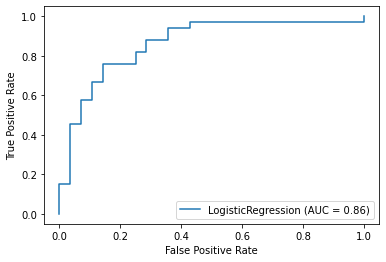

In [25]:
plot_roc_curve(clf,X_test,y_test)

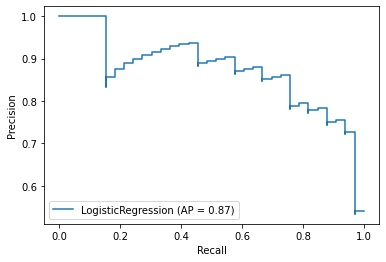

In [26]:
plot_precision_recall_curve(clf,X_test,y_test)

In [28]:
test_prob = clf.predict_proba(X_test)[:,1]
test_pred = clf.predict(X_test)

In [29]:
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))

Accuracy = 0.78689


Confusion matrix


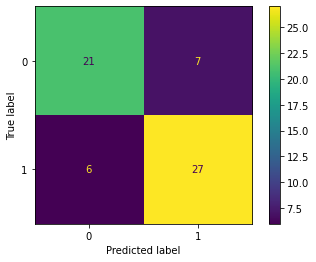

In [31]:
print('Confusion matrix')
plot_confusion_matrix(clf,X_test,y_test)

In [32]:
coefficients = np.hstack((clf.intercept_,clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols,'coefficient': coefficients})

,variable,coefficient
0,intercept,0.432231
1,cp_1,1.190541
2,cp_2,1.844035
3,cp_3,2.972369
4,exang,-0.637875
5,fbs,-0.471774
6,restecg_1,0.579262
7,restecg_2,-14.260550
8,sex,-1.732102
9,age,-0.195357


In [34]:
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,age,9.155678
1,trestbps,18.213060
2,chol,52.276077
3,thalach,22.867000
4,oldpeak,1.143967
